In [8]:
% matplotlib inline

import beeview
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [9]:
renderer = beeview.Renderer("../../data/hessen_2016/scene.obj",
                            "../../data/ommatidia.csv",True)

In [3]:
renderer.mode = renderer.BeeEye
renderer.set_ommatidium_size(2)
bee_eye_data = renderer.render_agent()
left_eye = bee_eye_data["left"]
right_eye = bee_eye_data["right"]

In [4]:
# radial to cartesian

def radial2cartesian(e,a):
    if a < 0:
        a = 360 + a
    e = 90 + e
    a = math.radians(a)
    e = math.radians(e)
    return np.array([math.sin(e)*math.cos(a), math.sin(e)*math.sin(a), math.cos(e)])

ValueError: zero-size array to reduction operation maximum which has no identity

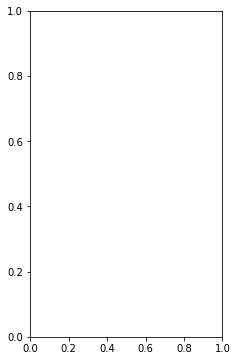

In [5]:
def beeview_xyz(bee_eye_data, offset = 0):
    x_max = np.max(bee_eye_data["right"]["coordinates"][:,0])
    y_max = np.max(bee_eye_data["right"]["coordinates"][:,1])
    e_max = np.max([bee_eye_data["left"]["elevation"],bee_eye_data["right"]["elevation"]])
    e_min = np.min([bee_eye_data["left"]["elevation"],bee_eye_data["right"]["elevation"]])
    a_max = np.max([bee_eye_data["left"]["azimuth"],bee_eye_data["right"]["azimuth"]])
    a_min = np.min([bee_eye_data["left"]["azimuth"],bee_eye_data["right"]["azimuth"]])
    
    img = np.zeros((int(y_max)+4,int(x_max)+4,3))

    for eye in [bee_eye_data["left"], bee_eye_data["right"]]:
        ommatidium = 0
        for coordinate in eye["coordinates"]:
            coordinate = coordinate.astype(int)
            for i in [0,1]:
                x = radial2cartesian(eye["elevation"][ommatidium], eye["azimuth"][ommatidium])
                #print(x)
                r = x[1] + offset
                g = x[2] + offset
                b = x[0] + offset
                
                for j in [0,1]:
                    img[coordinate[1]+i,coordinate[0]+j,0] = r
                    img[coordinate[1]+i,coordinate[0]+j,1] = g
                    img[coordinate[1]+i,coordinate[0]+j,2] = b
            ommatidium += 1
        
    return img


fig = plt.figure(figsize=(20, 6))
plt.subplot(151)
plt.imshow(beeview_xyz(bee_eye_data, offset=0))
plt.axis('off')
plt.title(r'$r=x$, $g=y$, $b=z$, offset=0')

plt.subplot(152)
plt.imshow(beeview_xyz(bee_eye_data, offset=0.25))
plt.axis('off')
plt.title(r'$r=x$, $g=y$, $b=z$, offset=0.25')

plt.subplot(153)
plt.imshow(beeview_xyz(bee_eye_data, offset=0.5))
plt.axis('off')
plt.title(r'$r=x$, $g=y$, $b=z$, offset=0.5')

plt.subplot(154)
plt.imshow(beeview_xyz(bee_eye_data, offset=0.75))
plt.axis('off')
plt.title(r'$r=x$, $g=y$, $b=z$, offset=0.75')

plt.subplot(155)
plt.imshow(beeview_xyz(bee_eye_data, offset=1))
plt.axis('off')
plt.title(r'$r=x$, $g=y$, $b=z$, offset=1')

plt.show()


plt.imshow(beeview_xyz(bee_eye_data, offset=0.5))
plt.axis('off')
plt.title(r'$r=x$, $g=y$, $b=z$, offset=0.5')
plt.show()

In [ ]:
def abs_degrees(e,a):
    if e < 0:
        e += 180
    if a < 0:
        a += 360

In [ ]:
def normalize(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

In [ ]:
def normalize2(x, x_min, x_max, new_min, new_max):
    return (new_max-new_min)/(x_max-x_min)*(x-x_min)+new_min

In [ ]:
 
    
def beeview_uv(bee_eye_data,  y = 0):
    
    x_max = np.max(bee_eye_data["right"]["coordinates"][:,0])
    y_max = np.max(bee_eye_data["right"]["coordinates"][:,1])
    e_max = np.max([left_eye["elevation"],right_eye["elevation"]])
    e_min = np.min([left_eye["elevation"],right_eye["elevation"]])
    a_max = np.max([left_eye["azimuth"],right_eye["azimuth"]])
    a_min = np.min([left_eye["azimuth"],right_eye["azimuth"]])
    
    img = np.zeros((int(y_max)+4,int(x_max)+4,3))

    for eye in [bee_eye_data["left"], bee_eye_data["right"]]:
        ommatidium = 0
        for coordinate in eye["coordinates"]:
            coordinate = coordinate.astype(int)
            for i in [0,1]:
                v = normalize2(eye["elevation"][ommatidium], e_min, e_max,-1,1)
                u = normalize2(eye["azimuth"][ommatidium], a_min, a_max,-1,1)

                b = y + (u/0.493)
                r = y + (v/0.877)
                g = 1.704*y - 0.509*r - 0.194*b

                for j in [0,1]:
                    img[coordinate[1]+i,coordinate[0]+j,0] = r
                    img[coordinate[1]+i,coordinate[0]+j,1] = g
                    img[coordinate[1]+i,coordinate[0]+j,2] = b
            ommatidium += 1
        
    return img

fig = plt.figure(figsize=(20, 6))
plt.subplot(151)
plt.imshow(beeview_uv(bee_eye_data,y=0))
plt.axis('off')
plt.title(r'$Y=0$, $U=\alpha$, $V=\epsilon$')
plt.subplot(152)
plt.imshow(beeview_uv(bee_eye_data, y = 0.25))
plt.title(r'$Y=0.25$, $U=\alpha$, $V=\epsilon$')
plt.axis('off')
plt.subplot(153)
plt.imshow(beeview_uv(bee_eye_data, y= 0.5))
plt.title(r'$Y=0.5$, $U=\alpha$, $V=\epsilon$')
plt.axis('off')
plt.subplot(154)
plt.imshow(beeview_uv(bee_eye_data, y= 0.75))
plt.title(r'$Y=0.75$, $U=\alpha$, $V=\epsilon$')
plt.axis('off')

plt.subplot(155)
plt.imshow(beeview_uv(bee_eye_data, y= 1))
plt.title(r'$Y=1$, $U=\alpha$, $V=\epsilon$')
plt.axis('off')

plt.show()

In [ ]:
plt.imshow(beeview_uv(bee_eye_data, y= 0.5))
plt.title(r'$Y=0.5$, $U=\alpha$, $V=\epsilon$')
plt.axis('off')

In [ ]:
x_max = np.max(bee_eye_data["right"]["coordinates"][:,0])
y_max = np.max(bee_eye_data["right"]["coordinates"][:,1])
img = np.zeros((int(y_max)+4,int(x_max)+4,3))
for eye in [bee_eye_data["left"],bee_eye_data["right"]]:
    ommatidium = 0
    for coordinate in eye["coordinates"]:
        coordinate = coordinate.astype(int)
        for i in [0,1]:
            for j in [0,1]:
                img[coordinate[1]+i,coordinate[0]+j,0] = eye["color"][ommatidium,0]
                img[coordinate[1]+i,coordinate[0]+j,1] = eye["color"][ommatidium,1]
                img[coordinate[1]+i,coordinate[0]+j,2] = eye["color"][ommatidium,2]
        ommatidium += 1
plt.imshow(img)